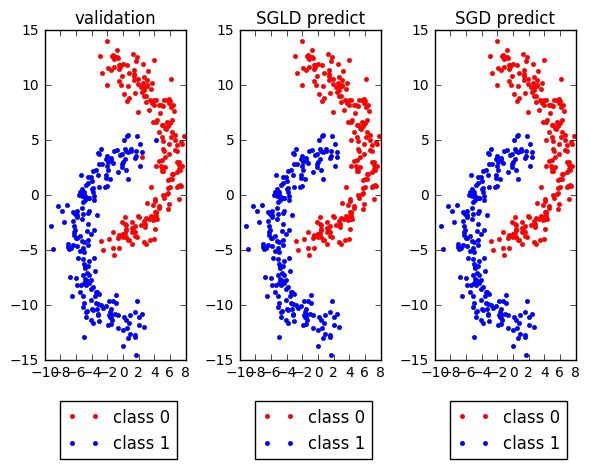

In [5]:
import numpy as np
import matplotlib.pyplot as plt

image = np.load('test.npy')
data = np.load('SGLD/SGLDdata.npy')

i0 = []
i1 = []
for i in xrange(400):
    if data[i][0] < 0.5:
        i0.append(i)
    else:
        i1.append(i)

plt.subplot(131)
plt.plot(image[:200, 0], image[:200, 1], 'r.', label='class 0')
plt.plot(image[200:, 0], image[200:400, 1], 'b.', label='class 1')
plt.legend(bbox_to_anchor=(1, -0.1))
plt.title('validation')

plt.subplot(132)
plt.plot(image[i0, 0], image[i0, 1], 'r.', label='class 0')
plt.plot(image[i1, 0], image[i1, 1], 'b.', label='class 1')
plt.legend(bbox_to_anchor=(1, -0.1))
plt.title('SGLD predict')

data = np.load('SGD/SGDdata.npy')

i0 = []
i1 = []
for i in xrange(400):
    if data[i][0] < 0.5:
        i0.append(i)
    else:
        i1.append(i)

plt.subplot(133)
plt.plot(image[i0, 0], image[i0, 1], 'r.', label='class 0')
plt.plot(image[i1, 0], image[i1, 1], 'b.', label='class 1')
plt.legend(bbox_to_anchor=(1, -0.1))
plt.title('SGD predict')

plt.tight_layout()

plt.show()

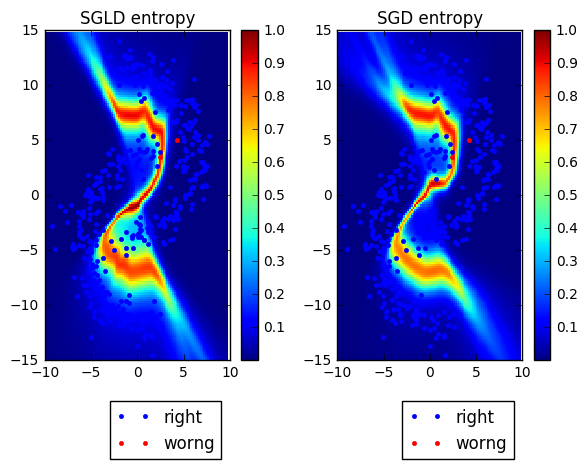

In [11]:
import numpy as np
import matplotlib.pyplot as plt

image = np.load('test.npy')
data = np.load('SGLD/SGLDdata.npy')

x = np.arange(-10., 10., 0.2)
y = np.arange(-15., 15., 0.2)
x, y = np.meshgrid(x, y)
entr = np.load('SGLD/entropy.npy').reshape(len(x), -1) / 80000 / np.log(2)
right = []
wrong = []
for i in xrange(len(data)):
    if data[i][0] == data[i][1]:
        right.append(i)
    else:
        wrong.append(i)

plt.subplot(121)
plt.plot(image[right, 0], image[right, 1], 'b.', label='right')
plt.plot(image[wrong, 0], image[wrong, 1], 'r.', label='worng')
plt.legend(bbox_to_anchor=(1, -0.1))
plt.pcolor(x, y, entr, vmax=1)
plt.colorbar()
plt.title('SGLD entropy')

image = np.load('test.npy')
data = np.load('SGD/SGDdata.npy')

x = np.arange(-10., 10., 0.2)
y = np.arange(-15., 15., 0.2)
x, y = np.meshgrid(x, y)
entr = np.load('SGD/entropy.npy').reshape(len(x), -1) / 80000 / np.log(2)
right = []
wrong = []
for i in xrange(len(data)):
    if data[i][0] == data[i][1]:
        right.append(i)
    else:
        wrong.append(i)

plt.subplot(122)
plt.plot(image[right, 0], image[right, 1], 'b.', label='right')
plt.plot(image[wrong, 0], image[wrong, 1], 'r.', label='worng')
plt.legend(bbox_to_anchor=(1, -0.1))
plt.pcolor(x, y, entr, vmax=1)
plt.colorbar()
plt.title('SGD entropy')

plt.tight_layout()

plt.show()

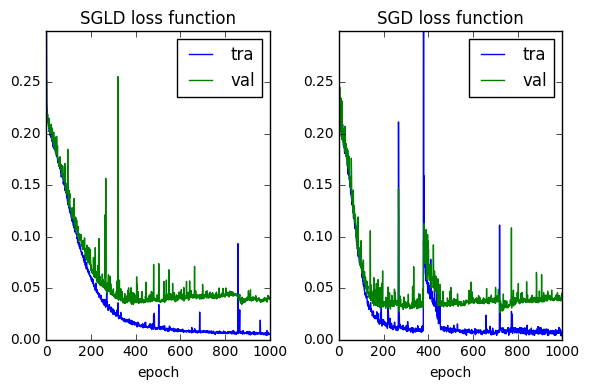

In [7]:
import numpy as np
import json
import matplotlib.pyplot as plt

with open("SGLD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_loss = []
val_loss = []

for i in xrange(len(data)):
    tra_loss.append(data[i]["main/loss"])
    val_loss.append(data[i]["validation/main/loss"])

tra_loss = np.array(tra_loss)
val_loss = np.array(val_loss)

plt.subplot(121)
plt.plot(epoch, tra_loss, label='tra')
plt.plot(epoch, val_loss, label='val')
plt.legend(loc='best')
plt.title('SGLD loss function')
plt.xlabel('epoch')
plt.ylim(0, 0.3)

with open("SGD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_loss = []
val_loss = []

for i in xrange(len(data)):
    tra_loss.append(data[i]["main/loss"])
    val_loss.append(data[i]["validation/main/loss"])

tra_loss = np.array(tra_loss)
val_loss = np.array(val_loss)

plt.subplot(122)
plt.plot(epoch, tra_loss, label='tra')
plt.plot(epoch, val_loss, label='val')
plt.legend(loc='best')
plt.title('SGD loss function')
plt.xlabel('epoch')
plt.ylim(0, 0.3)

plt.tight_layout()

plt.show()

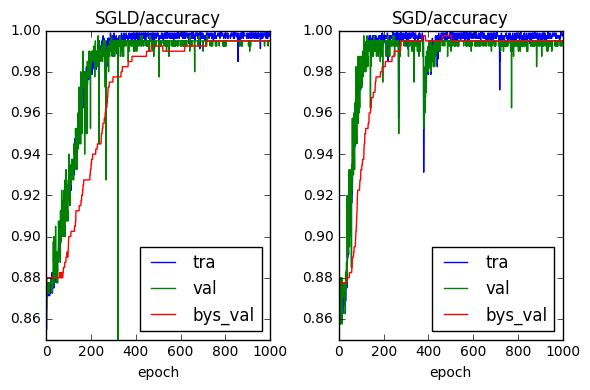

In [8]:
import numpy as np
import json
import matplotlib.pyplot as plt

bysac = np.loadtxt('SGLD/accuracy.csv', delimiter=',')

with open("SGLD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_acc = []
val_acc = []

for i in xrange(len(data)):
    tra_acc.append(data[i]["main/accuracy"])
    val_acc.append(data[i]["validation/main/accuracy"])

tra_acc = np.array(tra_acc)
val_acc = np.array(val_acc)

plt.subplot(121)
plt.plot(epoch, tra_acc, label='tra')
plt.plot(epoch, val_acc, label='val')
plt.plot(epoch, bysac, label='bys_val')
plt.legend(loc='best')
plt.title('SGLD/accuracy')
plt.xlabel('epoch')
plt.ylim(0.85, 1.)

bysac = np.loadtxt('SGD/accuracy.csv', delimiter=',')

with open("SGD/log", "r") as f:
    data = json.load(f)

epoch = np.arange(len(data)) + 1
tra_acc = []
val_acc = []

for i in xrange(len(data)):
    tra_acc.append(data[i]["main/accuracy"])
    val_acc.append(data[i]["validation/main/accuracy"])

tra_acc = np.array(tra_acc)
val_acc = np.array(val_acc)

plt.subplot(122)
plt.plot(epoch, tra_acc, label='tra')
plt.plot(epoch, val_acc, label='val')
plt.plot(epoch, bysac, label='bys_val')
plt.legend(loc='best')
plt.title('SGD/accuracy')
plt.xlabel('epoch')
plt.ylim(0.85, 1.)

plt.tight_layout()

plt.show()